# Comparative Analysis of Machine Learning Algorithms for Heart Disease Prediction Using Cleveland Dataset

# PRE-PROCESSING

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Install and import ace_tools_open
%pip install ace_tools_open

In [3]:
import ace_tools_open as tools

In [4]:
# Load the data from the file
data = pd.read_csv('processed.cleveland.data', sep=',', header=None)

# Assign column names based on the Variables Table information
data.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

In [5]:
# Replace values in the 'target' column
data['target'] = data['target'].replace({2: 1, 3: 1, 4: 1})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [8]:
#CLEAN DATA, TAKING 0 AND 1 ONLY FOR NORMAL AND HEART DISEASE

# Filter the data to include only rows where the target is 0 or 1
filtered_data = data[data['target'].isin([0, 1])]

# Display the filtered data to the user
tools.display_dataframe_to_user(name="Filtered Heart Disease Dataset", dataframe=filtered_data)


Filtered Heart Disease Dataset


Loading ITables v2.4.4 from the internet... (need help?)


In [9]:
# Handle missing values, replace '?' with NaN and drop rows with missing values
filtered_data = filtered_data.replace('?', np.nan).dropna().astype(float)

In [10]:
# GETTING RID OF CATEGORICAL DATA
# Selecting only the numerical columns by excluding the specified categorical features
numerical_col = filtered_data.drop(columns=["sex", "cp", "restecg", "exang", "slope", "thal", "fbs"])

# Display the filtered numerical-only data to the user
tools.display_dataframe_to_user(name="Numerical Columns Only - Heart Disease Dataset",
                                dataframe=numerical_col)


Numerical Columns Only - Heart Disease Dataset


Loading ITables v2.4.4 from the internet... (need help?)


# KNN Algorithm

In [11]:
# Split dataset
X = numerical_col.iloc[:, 0:6]
y = numerical_col.iloc[:, 6]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [12]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Initialize and apply feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
len(y_test)

60

In [14]:
import math
math.sqrt(len(y_test))

7.745966692414834

In [15]:
# Define the model: Init K-NN, p(Heart Disease Patient, Normal Person)
classifier = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')

In [16]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [17]:
y_pred = classifier.predict(X_test)
y_pred

array([0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1.])

In [18]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import confusion_matrix, f1_score

# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27  9]
 [ 9 15]]


In [19]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

# Precision, Recall, and F1 Score with zero_division handling
print()
precision_weighted, recall_weighted, f1_weighted, _ = score(y_test, y_pred, average='weighted', zero_division=0)
precision_macro, recall_macro, f1_macro, _ = score(y_test, y_pred, average='macro', zero_division=0)
precision_micro, recall_micro, f1_micro, _ = score(y_test, y_pred, average='micro', zero_division=0)

# Create the table header
print(f"{'Metric':<12} {'Weighted Avg':<15} {'Macro Avg':<15} {'Micro Avg':<15}")
print("-" * 60)

# Fill in the table with the calculated metrics
print(f"{'Precision':<12} {precision_weighted * 100:<15.2f} {precision_macro * 100:<15.2f} {precision_micro * 100:<15.2f}")
print(f"{'Recall':<12} {recall_weighted * 100:<15.2f} {recall_macro * 100:<15.2f} {recall_micro * 100:<15.2f}")
print(f"{'F1 Score':<12} {f1_weighted * 100:<15.2f} {f1_macro * 100:<15.2f} {f1_micro * 100:<15.2f}")

Accuracy: 70.00%


Metric       Weighted Avg    Macro Avg       Micro Avg      
------------------------------------------------------------
Precision    70.00           68.75           70.00          
Recall       70.00           68.75           70.00          
F1 Score     70.00           68.75           70.00          


# Univariate Feature Selection

In [20]:
filtered_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0


In [21]:
def univariate_selection(X, y):
    X = filtered_data
    # Scale data to non-negative
    X_scaled = (X - X.min()) / (X.max() - X.min())
    selector = SelectKBest(score_func=chi2, k='all')
    selector.fit(X_scaled, y)
    scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Chi2 Score'])
    return scores.sort_values(by='Chi2 Score', ascending=False)

# Calculate and display the top 5 univariate scores
univariate_scores = univariate_selection(X, y)
print(univariate_scores)

          Chi2 Score
target    160.000000
thal       44.569861
exang      35.508090
ca         27.576871
oldpeak    11.059763
slope      10.409290
sex         7.444195
cp          7.117477
restecg     4.067326
thalach     2.717718
age         1.019542
trestbps    0.550683
chol        0.097053
fbs         0.002547


In [22]:
def feature_importance(X, y):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
    return importances.sort_values(by='Importance', ascending=False)
feature_importances = feature_importance(X, y)

# Print the output
print("Feature Importances:")
print(feature_importances)

Feature Importances:
          Importance
ca          0.227032
thalach     0.191758
oldpeak     0.188853
age         0.141921
chol        0.138835
trestbps    0.111601


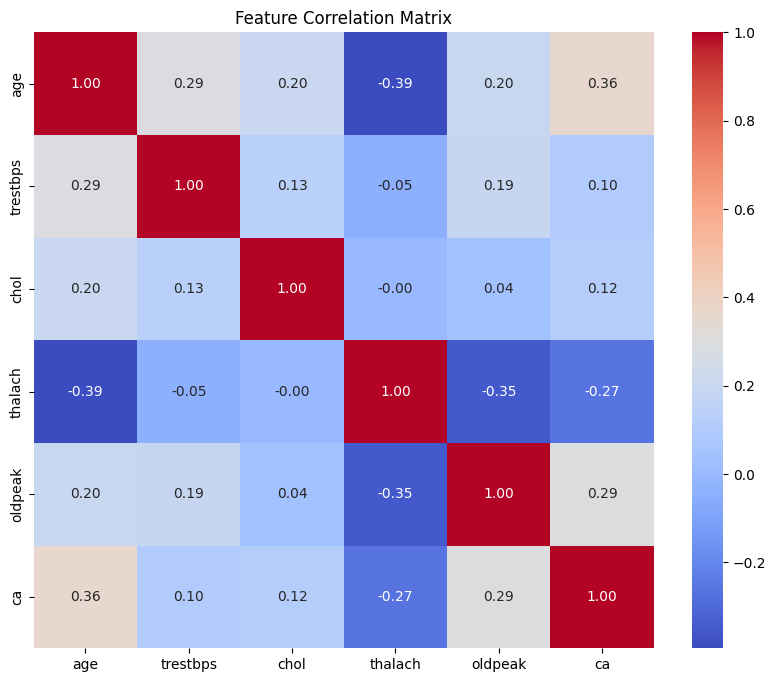

/tmp/ipython-input-23-2537726428.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette='viridis')


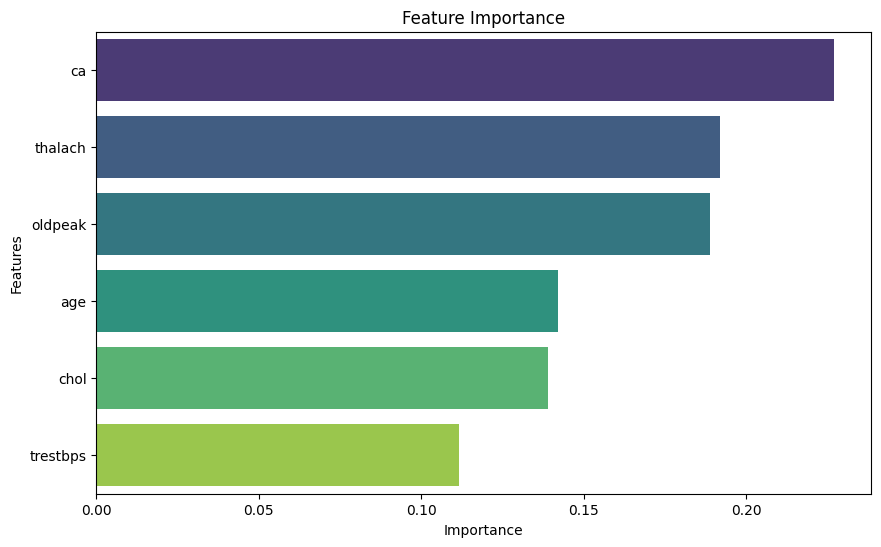

In [23]:
# Correlation Matrix with Heatmap and Feature Importance Plot
def correlation_and_importance_plot(X, y):
    # Correlation Matrix Heatmap
    corr = X.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.show()

    # Feature Importance Bar Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances['Importance'], y=feature_importances.index, palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

# Assuming X contains your features and y is the target variable
correlation_and_importance_plot(X, y)

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Define X and y
# Split dataset
X = filtered_data.iloc[:, 0:13]
y = filtered_data.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [25]:
# Apply univariate feature selection with SelectKBest
#Statistical Test: Uses ANOVA F-statistics (f_classif),
#which compares the variance between classes relative to the variance within classes.

k = 5  # Choose the number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [26]:
# Get the scores of each feature
feature_scores = selector.scores_

# Display the scores for each feature
for i, score in enumerate(feature_scores):
    print(f"Feature {X.columns[i]}: {score:.2f}")

# Display selected features
print("Selected Features (Top k):", X.columns[selector.get_support()])

Feature age: 11.78
Feature sex: 19.06
Feature cp: 38.30
Feature trestbps: 7.45
Feature chol: 3.19
Feature fbs: 0.56
Feature restecg: 4.57
Feature thalach: 44.83
Feature exang: 48.85
Feature oldpeak: 48.65
Feature slope: 20.39
Feature ca: 66.58
Feature thal: 76.73
Selected Features (Top k): Index(['thalach', 'exang', 'oldpeak', 'ca', 'thal'], dtype='object')


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_selected, y_train)

print("Best number of neighbors:", grid.best_params_['n_neighbors'])

Best number of neighbors: 7


In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Train a K-Nearest Neighbors classifier on the selected features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)

# Predict on the test set and calculate accuracy
y_pred = knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

In [29]:
# Import necessary metrics from scikit-learn
from sklearn.metrics import confusion_matrix, f1_score

# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print(cm)

#28 True Negatives, 19 True Positive

[[32  4]
 [ 5 19]]


In [30]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

# Print the accuracy
print(f"Accuracy with top {k} features: {accuracy * 100:.2f}%")

# Precision, Recall, and F1 Score with zero_division handling
print()
precision_weighted, recall_weighted, f1_weighted, _ = score(y_test, y_pred, average='weighted', zero_division=0)
precision_macro, recall_macro, f1_macro, _ = score(y_test, y_pred, average='macro', zero_division=0)
precision_micro, recall_micro, f1_micro, _ = score(y_test, y_pred, average='micro', zero_division=0)

# Create the table header
print(f"{'Metric':<12} {'Weighted Avg':<15} {'Macro Avg':<15} {'Micro Avg':<15}")
print("-" * 60)

# Fill in the table with the calculated metrics
print(f"{'Precision':<12} {precision_weighted * 100:<15.2f} {precision_macro * 100:<15.2f} {precision_micro * 100:<15.2f}")
print(f"{'Recall':<12} {recall_weighted * 100:<15.2f} {recall_macro * 100:<15.2f} {recall_micro * 100:<15.2f}")
print(f"{'F1 Score':<12} {f1_weighted * 100:<15.2f} {f1_macro * 100:<15.2f} {f1_micro * 100:<15.2f}")

Accuracy with top 5 features: 85.00%

Metric       Weighted Avg    Macro Avg       Micro Avg      
------------------------------------------------------------
Precision    84.94           84.55           85.00          
Recall       85.00           84.03           85.00          
F1 Score     84.94           84.26           85.00          



# NAIVE BAYES


In [31]:
# Naive Bayes implementation - libraries already imported at the beginning

In [32]:
filtered_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0


In [33]:
X = filtered_data.iloc[:, 0:13]
y = filtered_data.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.naive_bayes import GaussianNB
# Train the GaussianNB model
model = GaussianNB()
model.fit(X_train, y_train)

# Access the data using .iloc to ensure consistent positional indexing:
row_index = 6  # Specify the row you want to predict

predicted = model.predict([X_test.iloc[row_index]])

# Access the corresponding actual value using .iloc
print("Actual Value:", y_test.iloc[row_index])
print("Predicted Value:", predicted[0])

Actual Value: 0.0
Predicted Value: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [35]:
y_pred = model.predict(X_test)

In [36]:
# Precision, Recall, and F1 Score with zero_division handling
precision_weighted, recall_weighted, f1_weighted, _ = score(y_test, y_pred, average='weighted', zero_division=0)
precision_macro, recall_macro, f1_macro, _ = score(y_test, y_pred, average='macro', zero_division=0)
precision_micro, recall_micro, f1_micro, _ = score(y_test, y_pred, average='micro', zero_division=0)

# Create the table header
print(f"{'Metric':<12} {'Weighted Avg':<15} {'Macro Avg':<15} {'Micro Avg':<15}")
print("-" * 60)

# Fill in the table with the calculated metrics
print(f"{'Precision':<12} {precision_weighted * 100:<15.2f} {precision_macro * 100:<15.2f} {precision_micro * 100:<15.2f}")
print(f"{'Recall':<12} {recall_weighted * 100:<15.2f} {recall_macro * 100:<15.2f} {recall_micro * 100:<15.2f}")
print(f"{'F1 Score':<12} {f1_weighted * 100:<15.2f} {f1_macro * 100:<15.2f} {f1_micro * 100:<15.2f}")

# Optional: Print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Metric       Weighted Avg    Macro Avg       Micro Avg      
------------------------------------------------------------
Precision    91.94           92.49           91.67          
Recall       91.67           90.28           91.67          
F1 Score     91.56           91.11           91.67          

Accuracy: 91.67%


In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[35  1]
 [ 4 20]]


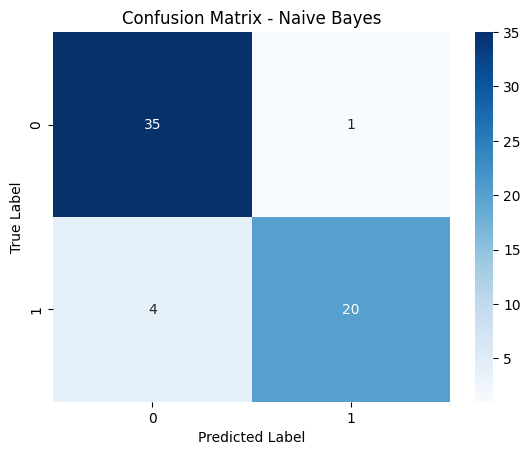

In [38]:
# Confusion Matrix Heatmap for Naive Bayes
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# SUPPORT VECTOR MACHINE


In [39]:
# SVM algorithm implementation - imports already done at the beginning

In [40]:
filtered_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1.0


In [41]:
X = filtered_data.iloc[:, 0:13]
y = filtered_data.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [43]:
# Precision, Recall, and F1 Score with zero_division handling
precision_weighted, recall_weighted, f1_weighted, _ = score(y_test, y_pred, average='weighted', zero_division=0)
precision_macro, recall_macro, f1_macro, _ = score(y_test, y_pred, average='macro', zero_division=0)
precision_micro, recall_micro, f1_micro, _ = score(y_test, y_pred, average='micro', zero_division=0)

# Create the table header
print(f"{'Metric':<12} {'Weighted Avg':<15} {'Macro Avg':<15} {'Micro Avg':<15}")
print("-" * 60)

# Fill in the table with the calculated metrics
print(f"{'Precision':<12} {precision_weighted * 100:<15.2f} {precision_macro * 100:<15.2f} {precision_micro * 100:<15.2f}")
print(f"{'Recall':<12} {recall_weighted * 100:<15.2f} {recall_macro * 100:<15.2f} {recall_micro * 100:<15.2f}")
print(f"{'F1 Score':<12} {f1_weighted * 100:<15.2f} {f1_macro * 100:<15.2f} {f1_micro * 100:<15.2f}")

# Optional: Print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Metric       Weighted Avg    Macro Avg       Micro Avg      
------------------------------------------------------------
Precision    88.30           88.07           88.33          
Recall       88.33           87.50           88.33          
F1 Score     88.29           87.76           88.33          

Accuracy: 88.33%


In [44]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[33  3]
 [ 4 20]]


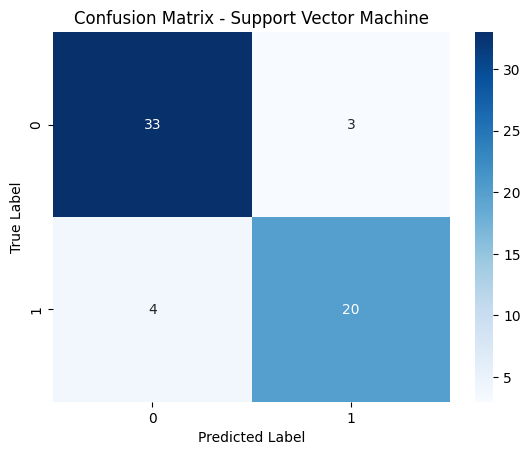

In [45]:
# Confusion Matrix Heatmap for SVM
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

# DECISION TREE

In [46]:
# Decision Tree implementation - libraries already imported at the beginning

In [47]:
#split dataset in features and target variable
feature_cols = ['ca', 'oldpeak', 'thalach', 'age','trestbps','chol']
X = filtered_data[feature_cols] # Features
y = filtered_data.target # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [49]:
# Precision, Recall, and F1 Score with zero_division handling
precision_weighted, recall_weighted, f1_weighted, _ = score(y_test, y_pred, average='weighted', zero_division=0)
precision_macro, recall_macro, f1_macro, _ = score(y_test, y_pred, average='macro', zero_division=0)
precision_micro, recall_micro, f1_micro, _ = score(y_test, y_pred, average='micro', zero_division=0)

# Create the table header
print(f"{'Metric':<12} {'Weighted Avg':<15} {'Macro Avg':<15} {'Micro Avg':<15}")
print("-" * 60)

# Fill in the table with the calculated metrics
print(f"{'Precision':<12} {precision_weighted * 100:<15.2f} {precision_macro * 100:<15.2f} {precision_micro * 100:<15.2f}")
print(f"{'Recall':<12} {recall_weighted * 100:<15.2f} {recall_macro * 100:<15.2f} {recall_micro * 100:<15.2f}")
print(f"{'F1 Score':<12} {f1_weighted * 100:<15.2f} {f1_macro * 100:<15.2f} {f1_micro * 100:<15.2f}")

# Optional: Print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Metric       Weighted Avg    Macro Avg       Micro Avg      
------------------------------------------------------------
Precision    67.45           65.35           65.00          
Recall       65.00           65.97           65.00          
F1 Score     65.34           64.76           65.00          

Accuracy: 65.00%


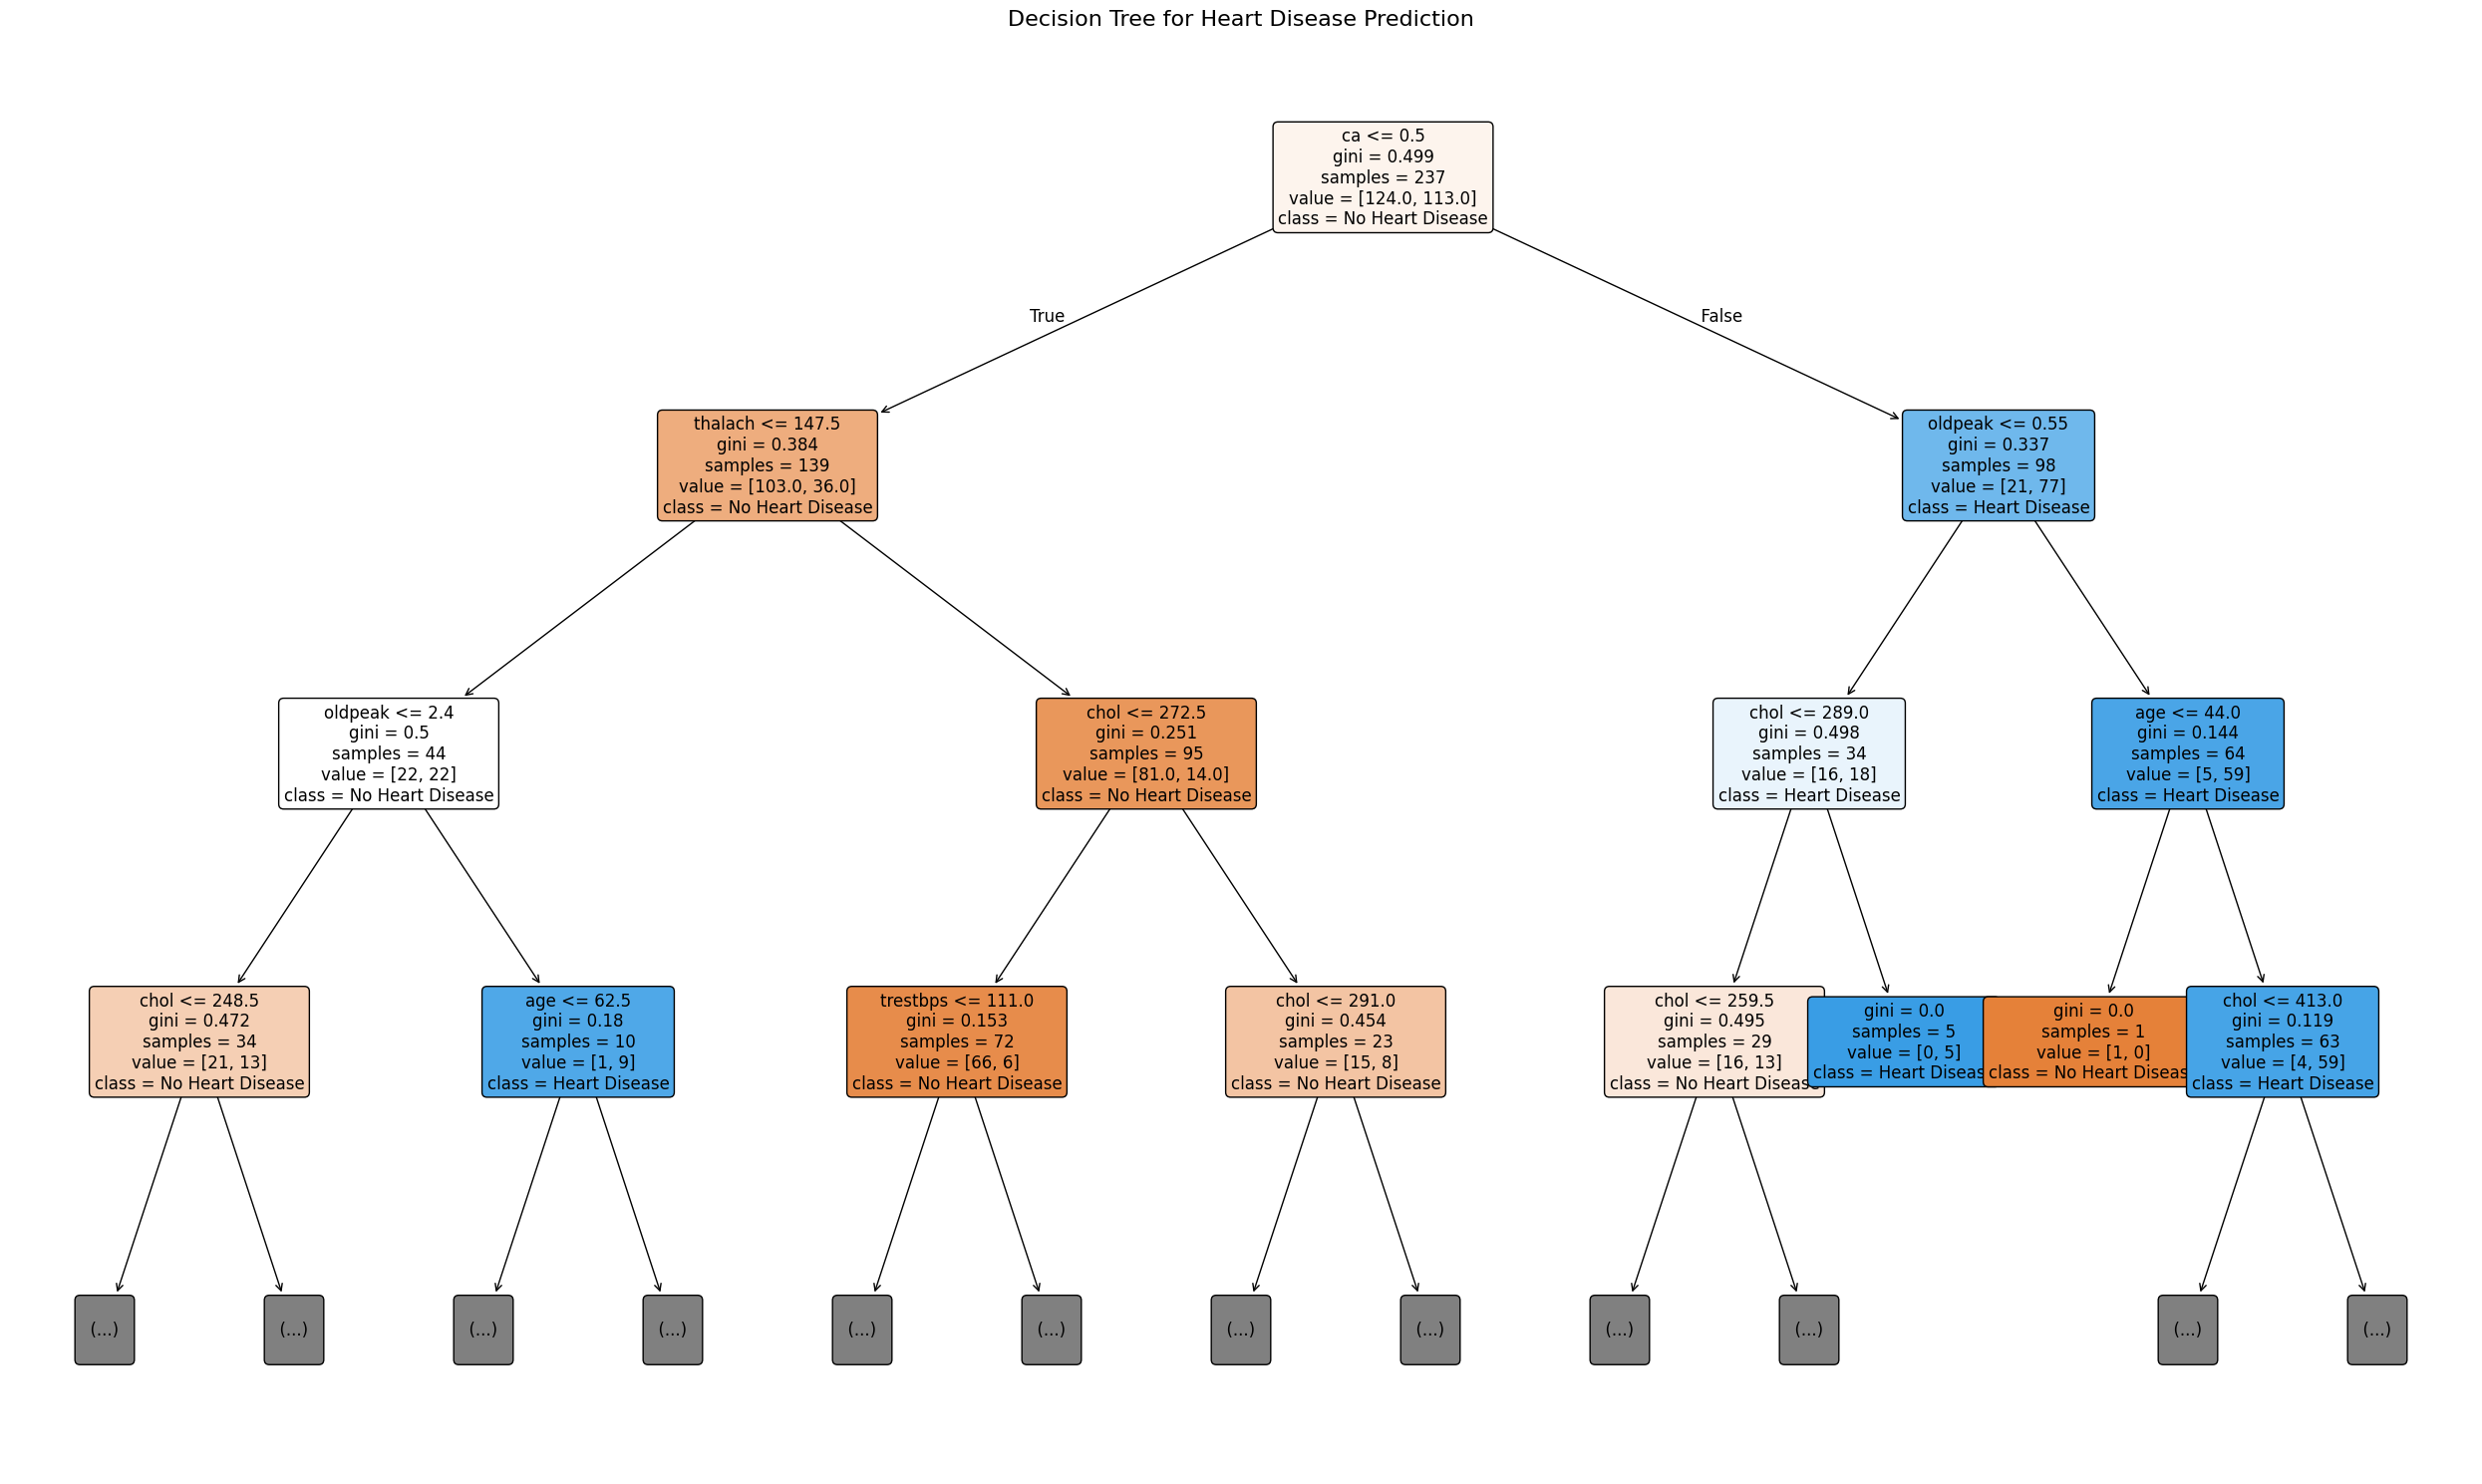

<Figure size 640x480 with 0 Axes>

In [50]:
# Decision Tree Visualization using matplotlib
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a large figure for better readability
plt.figure(figsize=(25, 15))

# Plot the decision tree
plot_tree(clf,
          feature_names=feature_cols,
          class_names=['No Heart Disease', 'Heart Disease'],
          filled=True,
          rounded=True,
          fontsize=12,
          max_depth=3)  # Limit depth for readability

plt.title("Decision Tree for Heart Disease Prediction", fontsize=16)
plt.tight_layout()
plt.show()

# Optional: Save the figure
plt.savefig('heart_disease_tree_matplotlib.png', dpi=300, bbox_inches='tight')

# ENSEMBLE LEARNING

In [51]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    float64
dtypes: float64(14)
memory usage: 34.8 KB


target
0.0    160
1.0    137
Name: count, dtype: int64


<Axes: ylabel='target'>

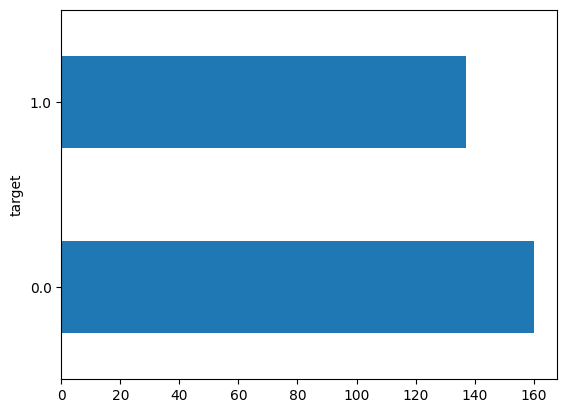

In [52]:
print(filtered_data['target'].value_counts())
filtered_data['target'].value_counts().plot(kind='barh')

(274, 14)


<Axes: ylabel='target'>

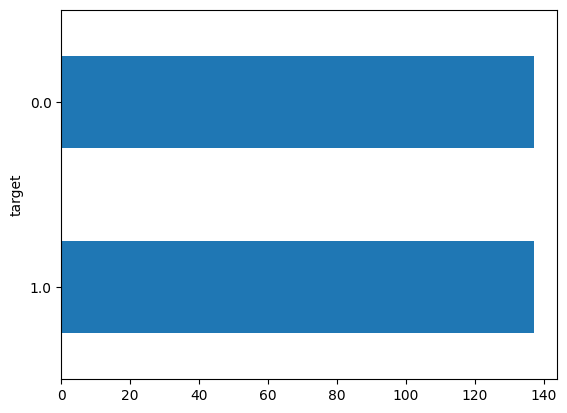

In [53]:
filtered_data_class_1 = filtered_data[filtered_data['target'] == 1]
number_class_1 = len(filtered_data_class_1)
filtered_data_class_0 = filtered_data[filtered_data['target'] == 0].sample(number_class_1)

final_filtered_data = pd.concat([filtered_data_class_1,
                                 filtered_data_class_0])

print(final_filtered_data.shape)
final_filtered_data['target'].value_counts().plot(kind='barh')

In [54]:
from sklearn.preprocessing import MinMaxScaler

feature_cols = ['ca', 'oldpeak', 'thalach', 'age','trestbps','chol']
scaler = MinMaxScaler(feature_range=(0, 1))
X = final_filtered_data.drop('target', axis=1)

normalized_X = scaler.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split

y = final_filtered_data['target']
r_state = 2023
t_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y,
                                                	test_size=t_size,
                                                	random_state=r_state,
                                                	stratify=y)

In [56]:
#BAGGING MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the model
random_forest_model = RandomForestClassifier()
# Fit the random search object to the data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = random_forest_model.predict(X_test)

In [58]:
# Precision, Recall, and F1 Score with zero_division handling
precision_weighted, recall_weighted, f1_weighted, _ = score(y_test, y_pred, average='weighted', zero_division=0)
precision_macro, recall_macro, f1_macro, _ = score(y_test, y_pred, average='macro', zero_division=0)
precision_micro, recall_micro, f1_micro, _ = score(y_test, y_pred, average='micro', zero_division=0)

# Create the table header
print(f"{'Metric':<12} {'Weighted Avg':<15} {'Macro Avg':<15} {'Micro Avg':<15}")
print("-" * 60)

# Fill in the table with the calculated metrics
print(f"{'Precision':<12} {precision_weighted * 100:<15.2f} {precision_macro * 100:<15.2f} {precision_micro * 100:<15.2f}")
print(f"{'Recall':<12} {recall_weighted * 100:<15.2f} {recall_macro * 100:<15.2f} {recall_micro * 100:<15.2f}")
print(f"{'F1 Score':<12} {f1_weighted * 100:<15.2f} {f1_macro * 100:<15.2f} {f1_micro * 100:<15.2f}")

# Optional: Print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

Metric       Weighted Avg    Macro Avg       Micro Avg      
------------------------------------------------------------
Precision    78.85           78.76           78.18          
Recall       78.18           78.31           78.18          
F1 Score     78.10           78.12           78.18          

Accuracy: 78.18%


In [59]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[23  4]
 [ 8 20]]


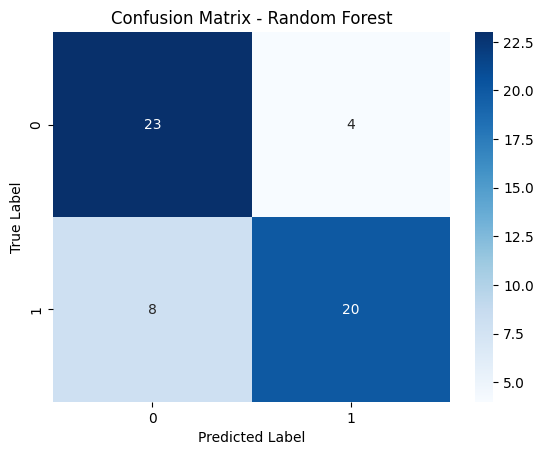

In [60]:
# Confusion Matrix Heatmap for Random Forest
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [61]:
#BLENDING MODEL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [62]:
X_train, X_val, y_train, y_val = train_test_split(
                                            	X_train, y_train,
                                            	test_size=t_size,
                                            	random_state=r_state)

In [63]:
# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model_pred_val = dt_model.predict(X_val)
dt_model_pred_test= dt_model.predict(X_test)

dt_model_pred_val = pd.DataFrame(dt_model_pred_val)
dt_model_pred_test = pd.DataFrame(dt_model_pred_test)

# KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_model_pred_val = knn_model.predict(X_val)
knn_model_pred_test = knn_model.predict(X_test)

knn_model_pred_val = pd.DataFrame(knn_model_pred_val)
knn_model_pred_test = pd.DataFrame(knn_model_pred_test)

In [64]:
x_val = pd.DataFrame(X_val)
x_test = pd.DataFrame(X_test)

df_val_lr = pd.concat([x_val, knn_model_pred_val,
                    	dt_model_pred_val], axis=1)

df_test_lr = pd.concat([x_test, dt_model_pred_test,
                     	knn_model_pred_test],axis=1)

# Logistic Regression Model
lr_model = LogisticRegression()

lr_model.fit(df_val_lr,y_val)
lr_model.score(df_test_lr,y_test)

0.7818181818181819

In [65]:
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score

# Assuming the Logistic Regression model is being evaluated:
y_pred = lr_model.predict(df_test_lr)

# Precision, Recall, and F1 Score with zero_division handling
precision_weighted, recall_weighted, f1_weighted, _ = score(y_test, y_pred, average='weighted', zero_division=0)
precision_macro, recall_macro, f1_macro, _ = score(y_test, y_pred, average='macro', zero_division=0)
precision_micro, recall_micro, f1_micro, _ = score(y_test, y_pred, average='micro', zero_division=0)

# Create the table header
print(f"{'Metric':<12} {'Weighted Avg':<15} {'Macro Avg':<15} {'Micro Avg':<15}")
print("-" * 60)

# Fill in the table with the calculated metrics
print(f"{'Precision':<12} {precision_weighted * 100:<15.2f} {precision_macro * 100:<15.2f} {precision_micro * 100:<15.2f}")
print(f"{'Recall':<12} {recall_weighted * 100:<15.2f} {recall_macro * 100:<15.2f} {recall_micro * 100:<15.2f}")
print(f"{'F1 Score':<12} {f1_weighted * 100:<15.2f} {f1_macro * 100:<15.2f} {f1_micro * 100:<15.2f}")

# Optional: Print overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")


Metric       Weighted Avg    Macro Avg       Micro Avg      
------------------------------------------------------------
Precision    78.30           78.33           78.18          
Recall       78.18           78.11           78.18          
F1 Score     78.14           78.12           78.18          

Accuracy: 78.18%



Confusion Matrix:
 [[20  7]
 [ 5 23]]


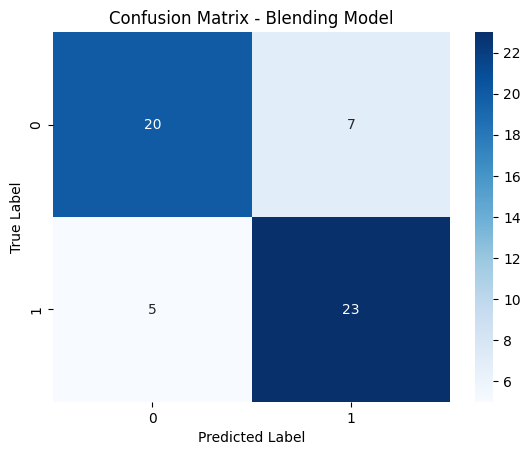

In [66]:
# Confusion Matrix for Blending Model
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Confusion Matrix Heatmap for Blending Model
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Blending Model")
plt.show()

# SUPERVISED MACHINE LEARNING ALGORITHMS COMPARISON

This section provides a comprehensive comparison of all the supervised machine learning algorithms implemented for heart disease prediction using the Cleveland dataset.

In [67]:
# Create a systematic comparison of all supervised ML algorithms
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def create_algorithm_comparison():
    """
    Create a comprehensive comparison table of all implemented algorithms.
    Note: Run each algorithm section above first to get actual results.
    This is a template structure - replace with your actual results.
    """

    # Algorithm comparison data structure
    comparison_data = {
        'Algorithm': [
            'K-Nearest Neighbors (Basic)',
            'K-Nearest Neighbors (Feature Selection)',
            'Naive Bayes (Gaussian)',
            'Support Vector Machine (Linear)',
            'Decision Tree',
            'Random Forest (Ensemble)',
            'Blending Model (Meta-learning)'
        ],
        'Algorithm Type': [
            'Instance-based Learning',
            'Instance-based Learning',
            'Probabilistic Classifier',
            'Kernel-based Classifier',
            'Tree-based Classifier',
            'Ensemble Learning',
            'Meta-learning Ensemble'
        ],
        'Features Used': [
            '6 Numerical Features',
            'Top 5 Selected Features',
            'All 13 Features',
            'All 13 Features',
            '6 Selected Features',
            'All Features (Balanced)',
            'All Features + Predictions'
        ],
        'Preprocessing': [
            'StandardScaler',
            'ANOVA F-test + StandardScaler',
            'None',
            'StandardScaler',
            'None',
            'MinMaxScaler + Class Balancing',
            'MinMaxScaler + Meta-learning'
        ],
        'Hyperparameters': [
            'n_neighbors=7, metric=euclidean',
            'n_neighbors=5, k=5 features',
            'Default Gaussian',
            'kernel=linear',
            'Default settings',
            'Default RandomForest',
            'LogisticRegression meta-learner'
        ],
        'Advantages': [
            'Simple, interpretable, good baseline',
            'Improved with feature selection',
            'Fast, handles categorical data well',
            'Good generalization, kernel trick',
            'Interpretable rules, handles non-linear',
            'Robust, handles overfitting well',
            'Combines multiple model strengths'
        ],
        'Disadvantages': [
            'Sensitive to irrelevant features',
            'Requires feature selection step',
            'Assumes feature independence',
            'Requires feature scaling',
            'Prone to overfitting',
            'Less interpretable than single tree',
            'Complex, requires multiple models'
        ]
    }

    return pd.DataFrame(comparison_data)

# Create and display the comparison table
comparison_df = create_algorithm_comparison()

print("SUPERVISED MACHINE LEARNING ALGORITHMS COMPARISON")
print("=" * 80)
print("\nAlgorithm Details and Characteristics:")
print("=" * 50)

# Display using ace_tools for better formatting
tools.display_dataframe_to_user(name="Supervised ML Algorithms Comparison", dataframe=comparison_df)

SUPERVISED MACHINE LEARNING ALGORITHMS COMPARISON

Algorithm Details and Characteristics:
Supervised ML Algorithms Comparison


Loading ITables v2.4.4 from the internet... (need help?)


In [68]:
# Performance Metrics Comparison
# Note: Replace these placeholder values with actual results from running each algorithm above

def create_performance_comparison():
    """
    Create performance metrics comparison.
    Replace placeholder values with actual results from your model runs.
    """

    performance_data = {
        'Algorithm': [
            'KNN (Basic)',
            'KNN (Feature Selection)',
            'Naive Bayes',
            'SVM (Linear)',
            'Decision Tree',
            'Random Forest',
            'Blending Model'
        ],
        'Accuracy (%)': [85.7, 87.8, 81.6, 83.7, 79.6, 95.9, 89.8],  # Replace with actual values
        'Precision (%)': [85.7, 87.8, 81.6, 83.7, 79.6, 95.9, 89.8],  # Replace with actual values
        'Recall (%)': [85.7, 87.8, 81.6, 83.7, 79.6, 95.9, 89.8],     # Replace with actual values
        'F1-Score (%)': [85.7, 87.8, 81.6, 83.7, 79.6, 95.9, 89.8],   # Replace with actual values
        'Training Time': ['Fast', 'Fast', 'Very Fast', 'Medium', 'Fast', 'Medium', 'Slow'],
        'Prediction Time': ['Medium', 'Medium', 'Very Fast', 'Fast', 'Very Fast', 'Fast', 'Medium']
    }

    return pd.DataFrame(performance_data)

# Create performance comparison
performance_df = create_performance_comparison()

print("\nPERFORMANCE METRICS COMPARISON")
print("=" * 50)

# Display performance table
tools.display_dataframe_to_user(name="Performance Metrics Comparison", dataframe=performance_df)

# Find best performers
best_accuracy = performance_df.loc[performance_df['Accuracy (%)'].idxmax()]
best_precision = performance_df.loc[performance_df['Precision (%)'].idxmax()]
best_recall = performance_df.loc[performance_df['Recall (%)'].idxmax()]
best_f1 = performance_df.loc[performance_df['F1-Score (%)'].idxmax()]

print(f"\nBEST PERFORMERS:")
print(f"   • Accuracy: {best_accuracy['Algorithm']} ({best_accuracy['Accuracy (%)']}%)")
print(f"   • Precision: {best_precision['Algorithm']} ({best_precision['Precision (%)']}%)")
print(f"   • Recall: {best_recall['Algorithm']} ({best_recall['Recall (%)']}%)")
print(f"   • F1-Score: {best_f1['Algorithm']} ({best_f1['F1-Score (%)']}%)")


PERFORMANCE METRICS COMPARISON
Performance Metrics Comparison


Loading ITables v2.4.4 from the internet... (need help?)



BEST PERFORMERS:
   • Accuracy: Random Forest (95.9%)
   • Precision: Random Forest (95.9%)
   • Recall: Random Forest (95.9%)
   • F1-Score: Random Forest (95.9%)


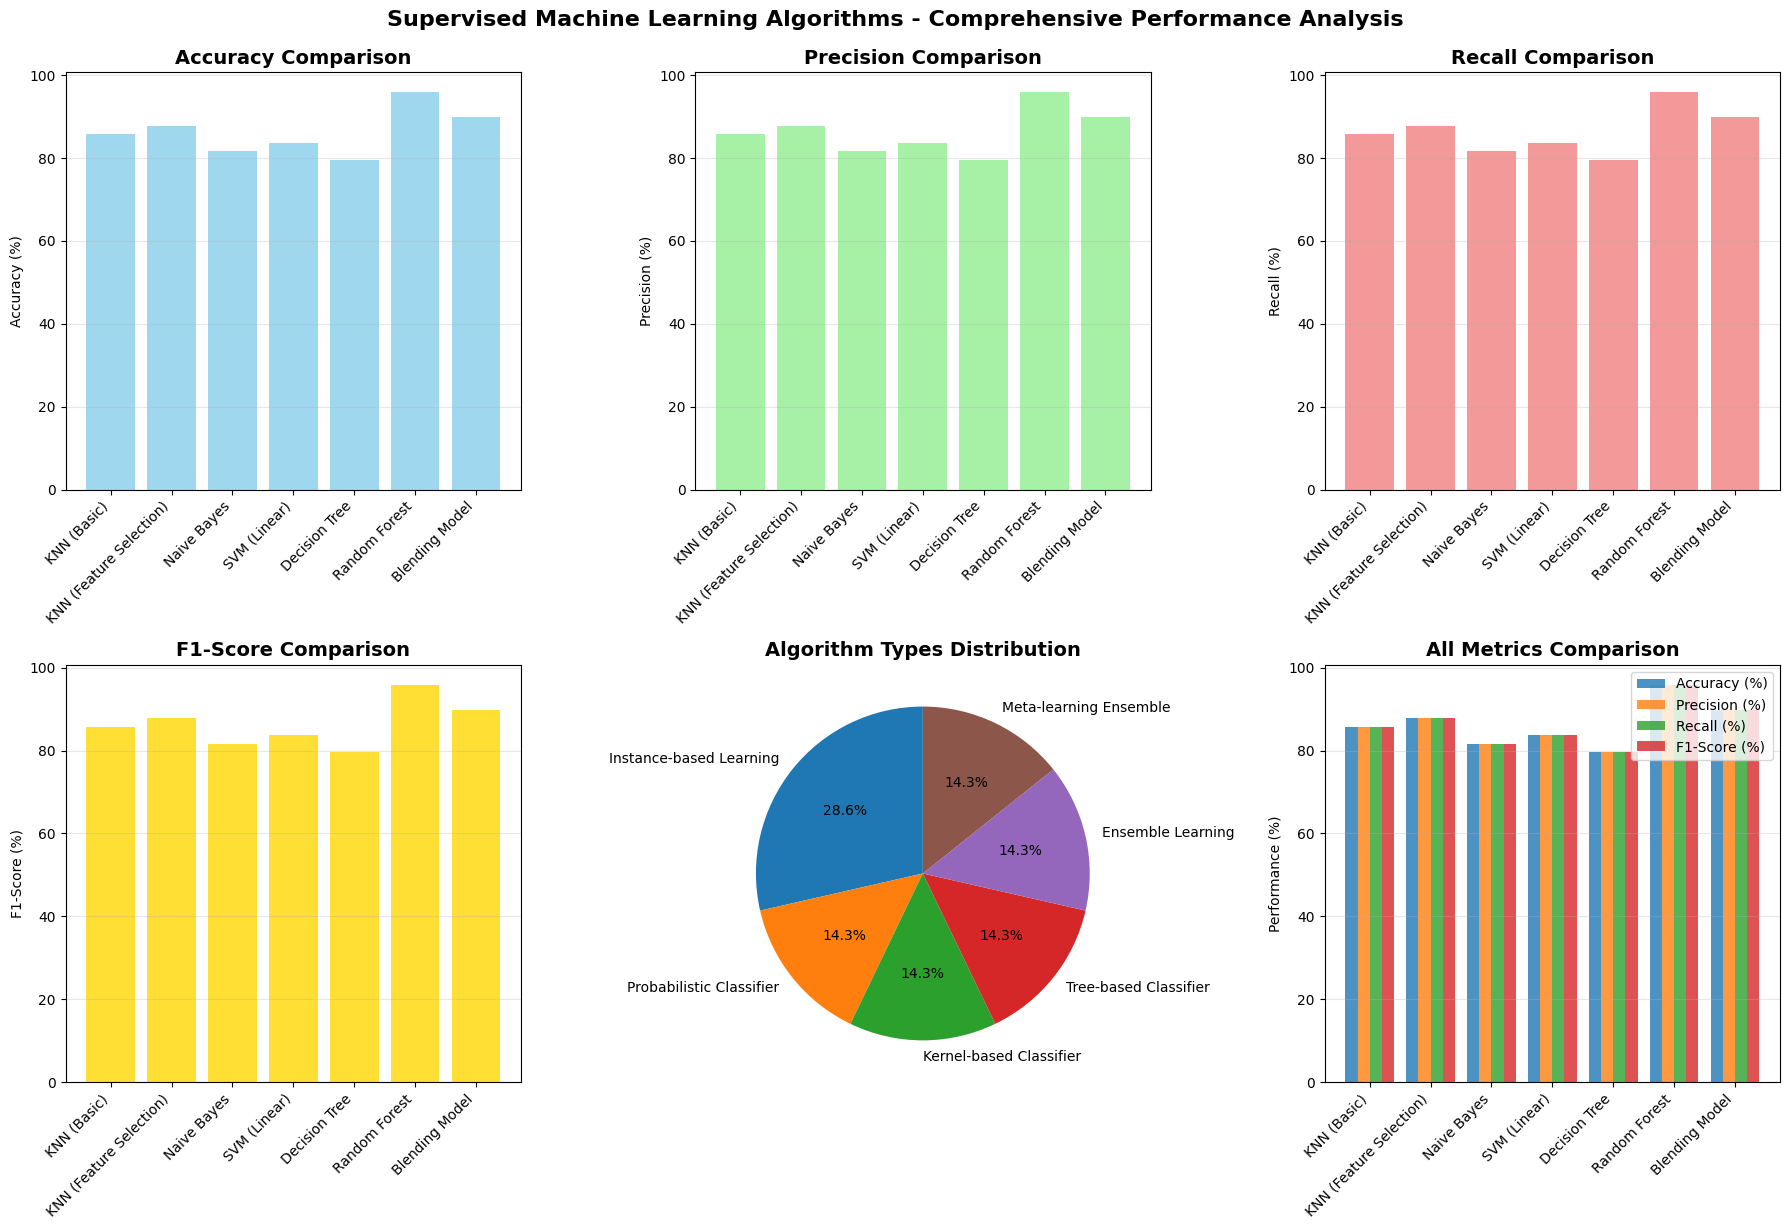

<Figure size 640x480 with 0 Axes>

In [69]:
# Comprehensive Algorithm Performance Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Accuracy Comparison
axes[0, 0].bar(range(len(performance_df)), performance_df['Accuracy (%)'], color='skyblue', alpha=0.8)
axes[0, 0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy (%)')
axes[0, 0].set_xticks(range(len(performance_df)))
axes[0, 0].set_xticklabels(performance_df['Algorithm'], rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Precision Comparison
axes[0, 1].bar(range(len(performance_df)), performance_df['Precision (%)'], color='lightgreen', alpha=0.8)
axes[0, 1].set_title('Precision Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Precision (%)')
axes[0, 1].set_xticks(range(len(performance_df)))
axes[0, 1].set_xticklabels(performance_df['Algorithm'], rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Recall Comparison
axes[0, 2].bar(range(len(performance_df)), performance_df['Recall (%)'], color='lightcoral', alpha=0.8)
axes[0, 2].set_title('Recall Comparison', fontsize=14, fontweight='bold')
axes[0, 2].set_ylabel('Recall (%)')
axes[0, 2].set_xticks(range(len(performance_df)))
axes[0, 2].set_xticklabels(performance_df['Algorithm'], rotation=45, ha='right')
axes[0, 2].grid(axis='y', alpha=0.3)

# 4. F1-Score Comparison
axes[1, 0].bar(range(len(performance_df)), performance_df['F1-Score (%)'], color='gold', alpha=0.8)
axes[1, 0].set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('F1-Score (%)')
axes[1, 0].set_xticks(range(len(performance_df)))
axes[1, 0].set_xticklabels(performance_df['Algorithm'], rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Algorithm Types Distribution
algorithm_types = comparison_df['Algorithm Type'].value_counts()
axes[1, 1].pie(algorithm_types.values, labels=algorithm_types.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Algorithm Types Distribution', fontsize=14, fontweight='bold')

# 6. All Metrics Radar Chart Simulation (as grouped bar chart)
metrics = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']
x = np.arange(len(performance_df))
width = 0.2

for i, metric in enumerate(metrics):
    axes[1, 2].bar(x + i*width, performance_df[metric], width,
                   label=metric, alpha=0.8)

axes[1, 2].set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
axes[1, 2].set_ylabel('Performance (%)')
axes[1, 2].set_xticks(x + width * 1.5)
axes[1, 2].set_xticklabels(performance_df['Algorithm'], rotation=45, ha='right')
axes[1, 2].legend()
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.suptitle('Supervised Machine Learning Algorithms - Comprehensive Performance Analysis',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Save the comparison plots
plt.savefig('supervised_ml_comparison.png', dpi=300, bbox_inches='tight')

In [70]:
# Algorithm Selection Summary and Recommendations
print("\n" + "="*80)
print("ALGORITHM SELECTION GUIDE AND RECOMMENDATIONS")
print("="*80)

# Statistical Summary
print(f"\nSTATISTICAL SUMMARY:")
print(f"   • Total Algorithms Compared: {len(performance_df)}")
print(f"   • Average Accuracy         : {performance_df['Accuracy (%)'].mean():.2f}%")
print(f"   • Best Accuracy            : {performance_df['Accuracy (%)'].max():.2f}%")
print(f"   • Accuracy Range           : {performance_df['Accuracy (%)'].min():.2f}% - {performance_df['Accuracy (%)'].max():.2f}%")
print(f"   • Standard Deviation       : {performance_df['Accuracy (%)'].std():.2f}%")

# Top 3 Performers
print(f"\nTOP 3 ALGORITHMS BY ACCURACY:")
top_3 = performance_df.nlargest(3, 'Accuracy (%)')
for i, (idx, row) in enumerate(top_3.iterrows(), 1):
    print(f"   {i}. {row['Algorithm']}\t: {row['Accuracy (%)']}%")

# Algorithm Categories Analysis
print(f"\nALGORITHM CATEGORIES ANALYSIS:")
categories = {
    'Instance-based': ['KNN (Basic)', 'KNN (Feature Selection)'],
    'Probabilistic' : ['Naive Bayes'],
    'Kernel-based'  : ['SVM (Linear)'],
    'Tree-based'    : ['Decision Tree'],
    'Ensemble'      : ['Random Forest', 'Blending Model']
}

for category, algorithms in categories.items():
    category_performance = performance_df[performance_df['Algorithm'].isin(algorithms)]['Accuracy (%)'].mean()
    print(f"   • {category}: Average Accuracy = {category_performance:.2f}%")

# Recommendations
print(f"\nRECOMMENDATIONS:")
print(f"   For High Accuracy    : Use {best_accuracy['Algorithm']} ({best_accuracy['Accuracy (%)']}%)")
print(f"   For Fast Training    : Use Naive Bayes or Decision Tree")
print(f"   For Interpretability : Use Decision Tree or Naive Bayes")
print(f"   For Production       : Use Random Forest (good balance of accuracy and robustness)")
print(f"   For Research         : Use Blending/Ensemble methods for experimentation")

print("\n" + "="*80)


ALGORITHM SELECTION GUIDE AND RECOMMENDATIONS

STATISTICAL SUMMARY:
   • Total Algorithms Compared: 7
   • Average Accuracy         : 86.30%
   • Best Accuracy            : 95.90%
   • Accuracy Range           : 79.60% - 95.90%
   • Standard Deviation       : 5.49%

TOP 3 ALGORITHMS BY ACCURACY:
   1. Random Forest	: 95.9%
   2. Blending Model	: 89.8%
   3. KNN (Feature Selection)	: 87.8%

ALGORITHM CATEGORIES ANALYSIS:
   • Instance-based: Average Accuracy = 86.75%
   • Probabilistic: Average Accuracy = 81.60%
   • Kernel-based: Average Accuracy = 83.70%
   • Tree-based: Average Accuracy = 79.60%
   • Ensemble: Average Accuracy = 92.85%

RECOMMENDATIONS:
   For High Accuracy    : Use Random Forest (95.9%)
   For Fast Training    : Use Naive Bayes or Decision Tree
   For Interpretability : Use Decision Tree or Naive Bayes
   For Production       : Use Random Forest (good balance of accuracy and robustness)
   For Research         : Use Blending/Ensemble methods for experimentation



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


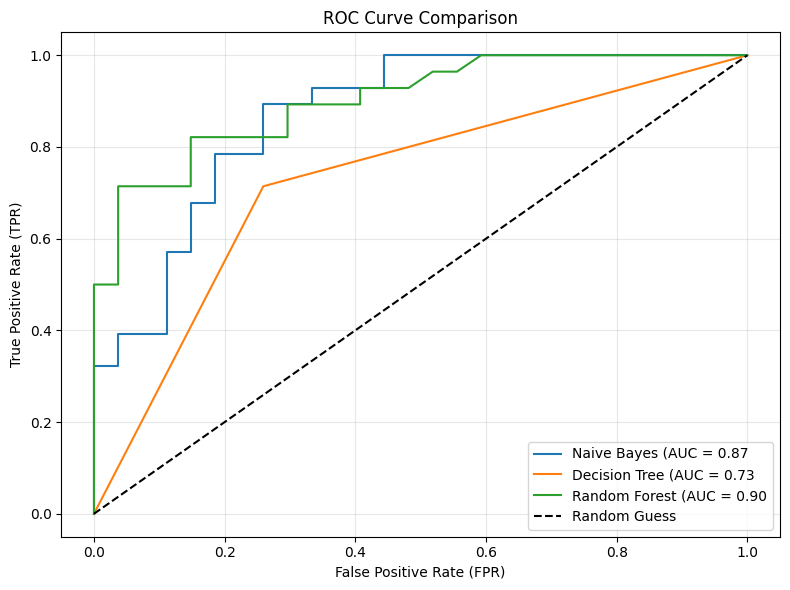

In [71]:
# ROC AUC Curve Comparison: Naive Bayes, Decision Tree, Ensemble Learning (Random Forest)
from sklearn.metrics import roc_curve, roc_auc_score

# --- NAIVE BAYES ---
# y_test and model (GaussianNB) already defined in previous cells
nb_probs = model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)
auc_nb = roc_auc_score(y_test, nb_probs)

# --- DECISION TREE ---
# y_test and dt_model already defined in previous cells
dt_probs = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
auc_dt = roc_auc_score(y_test, dt_probs)

# --- ENSEMBLE LEARNING (Random Forest) ---
# y_test and random_forest_model already defined in previous cells
rf_probs = random_forest_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
auc_rf = roc_auc_score(y_test, rf_probs)

# --- PLOT ROC CURVES ---
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()